<a href="https://colab.research.google.com/github/Fabian-LG/Red-prediccion/blob/ejercicio_2/Prueba1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Red neuronal secuencial
from tensorflow.keras.models import Sequential
#Capa completamente conectada
from tensorflow.keras.layers import Dense, Normalization
#Optimizador
from tensorflow.keras.optimizers import Adam
import tensorflow as tf


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score

In [ ]:
"""data = pd.read_csv('data5.csv', encoding='unicode_escape')
data.columns = ['Estanque', 'Hectareas', 'tC_am', 'tC_pm','O2_am', 'O2_pm', 'Dias_cultivo', 'Dia_anio', 'Total']
df = pd.DataFrame(data)
df"""

"data = pd.read_csv('data5.csv', encoding='unicode_escape')\ndata.columns = ['Estanque', 'Hectareas', 'tC_am', 'tC_pm','O2_am', 'O2_pm', 'Dias_cultivo', 'Dia_anio', 'Total']\ndf = pd.DataFrame(data)\ndf"

In [ ]:
data = pd.read_csv('data.csv', encoding='unicode_escape')
data.columns = ['Estanque', 'Hectareas', 'tC_am', 'tC_pm','O2_am', 'O2_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']
df = pd.DataFrame(data)

#2 df = df.loc[:,['Estanque', 'Hectareas', 'tC_am', 'O2_am', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']]
df = df.loc[:,['Estanque', 'Hectareas', 'tC_pm', 'O2_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']]
#4 df = df.loc[:,['Estanque', 'Hectareas', 'tC_am', 'O2_am', 'Dias_cultivo', 'Dia_anio', 'Total']]
#5 df = df.loc[:,['Estanque', 'Hectareas', 'tC_pm', 'O2_pm', 'Dias_cultivo', 'Dia_anio', 'Total']]
#6 df = df.loc[:, ['Estanque', 'Hectareas', 'tC_am', 'tC_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']]
#7 df = df.loc[:,['Estanque', 'Hectareas', 'tC_am', 'tC_pm', 'Dias_cultivo', 'Dia_anio', 'Total']]

#8 df = df.loc[:,['Estanque', 'Hectareas', 'tC_am', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']]

#9 df = df.loc[:,['Estanque', 'Hectareas', 'tC_am', 'Dias_cultivo', 'Dia_anio', 'Total']]
#10 df = df.loc[:,['Estanque', 'Hectareas', 'tC_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']]
#11 df = df.loc[:,['Estanque', 'Hectareas', 'tC_pm', 'Dias_cultivo', 'Dia_anio', 'Total']]
#12 df = df.loc[:,['Estanque', 'Hectareas', 'O2_am', 'O2_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']]
#13 df = df.loc[:,['Estanque', 'Hectareas', 'O2_am', 'O2_pm', 'Dias_cultivo', 'Dia_anio', 'Total']]
#14 df = df.loc[:,['Estanque', 'Hectareas', 'O2_am', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']]
#15 df = df.loc[:,['Estanque', 'Hectareas', 'O2_am', 'Dias_cultivo', 'Dia_anio', 'Total']]
#16 df = df.loc[:,['Estanque', 'Hectareas', 'O2_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']]
#17 df = df.loc[:,['Estanque', 'Hectareas', 'O2_pm', 'Dias_cultivo', 'Dia_anio', 'Total']]
#18 df = df.loc[:,['Estanque', 'Hectareas', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']]
#19 df = df.loc[25:3700,['Estanque', 'Hectareas', 'Dias_cultivo', 'Dia_anio', 'Total']]

df

,Estanque,Hectareas,tC_pm,O2_pm,Biomasa,Dias_cultivo,Dia_anio,Total
0,1,6,24.4,7.5,NaN,6,102,25.00
1,2,6,24.6,7.6,NaN,6,102,25.00
2,3,6,24.3,7.5,NaN,6,102,25.00
3,4,6,24.7,7.5,NaN,6,102,25.00
4,5,6,24.3,7.6,NaN,6,102,25.00
...,...,...,...,...,...,...,...,...
4355,6,6,23.9,6.9,NaN,209,305,126.32
4356,7,6,23.7,6.4,NaN,209,305,125.55
4357,10,6,23.8,6.5,NaN,209,305,125.51
4358,18,6,22.8,6.7,NaN,209,305,127.03


In [ ]:
df = df.dropna()
df

,Estanque,Hectareas,tC_pm,O2_pm,Biomasa,Dias_cultivo,Dia_anio,Total
285,1,6,25.4,6.7,528.0,18,114,75.00
286,2,6,25.6,7.1,424.0,18,114,75.00
287,3,6,25.9,6.6,444.0,18,114,75.00
288,4,6,25.2,6.9,487.0,18,114,75.00
289,5,6,25.5,6.8,464.0,18,114,75.00
...,...,...,...,...,...,...,...,...
2410,20,6,30.2,6.9,14392.0,108,204,376.25
2411,21,6,30.3,7.1,15090.0,108,204,302.19
2412,22,6,30.2,7.2,14735.0,108,204,402.32
2413,23,6,30.4,5.8,14872.0,108,204,352.13


In [ ]:
scaler = MinMaxScaler().fit(df)
scaler

MinMaxScaler()

In [ ]:
scaler.data_min_

array([  1. ,   5. ,  24. ,   0.8, 197. ,  18. , 114. ,  50. ])

In [ ]:
scaler.data_max_

array([2.4000e+01, 7.0000e+00, 3.5700e+01, 1.1200e+01, 1.7701e+04,
       1.0800e+02, 2.0400e+02, 5.7595e+02])

In [ ]:
df.describe()

,Estanque,Hectareas,tC_pm,O2_pm,Biomasa,Dias_cultivo,Dia_anio,Total
count,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000
mean,12.463463,6.041041,30.170135,6.642883,8164.026026,62.365866,158.365866,277.254059
std,6.934591,0.348568,2.576809,0.866238,4816.280981,26.681428,26.681428,141.796873
min,1.000000,5.000000,24.000000,0.800000,197.000000,18.000000,114.000000,50.000000
25%,6.000000,6.000000,28.200000,6.200000,3820.000000,39.000000,135.000000,150.000000
50%,12.000000,6.000000,30.400000,6.600000,8309.000000,61.000000,157.000000,275.000000
75%,18.000000,6.000000,32.400000,7.000000,12580.500000,86.000000,182.000000,402.532500
max,24.000000,7.000000,35.700000,11.200000,17701.000000,108.000000,204.000000,575.950000


In [ ]:
scaler.feature_range

(0, 1)

In [ ]:
data_norm = scaler.transform(df)
data_norm

array([[0.        , 0.5       , 0.11965812, ..., 0.        , 0.        ,
        0.04753304],
       [0.04347826, 0.5       , 0.13675214, ..., 0.        , 0.        ,
        0.04753304],
       [0.08695652, 0.5       , 0.16239316, ..., 0.        , 0.        ,
        0.04753304],
       ...,
       [0.91304348, 0.5       , 0.52991453, ..., 1.        , 1.        ,
        0.66987356],
       [0.95652174, 0.5       , 0.54700855, ..., 1.        , 1.        ,
        0.57444624],
       [1.        , 0.        , 0.53846154, ..., 1.        , 1.        ,
        0.28795513]])

In [ ]:
#data_norm_df = pd.DataFrame(data_norm, columns=['Estanque', 'Hectareas', 'tC_am', 'tC_pm','O2_am', 'O2_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total'])
#2 data_norm_df = pd.DataFrame(data_norm, columns=['Estanque', 'Hectareas', 'tC_am', 'O2_am', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total'])
data_norm_df = pd.DataFrame(data_norm, columns=['Estanque', 'Hectareas', 'tC_pm', 'O2_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total'])
#4 data_norm_df = pd.DataFrame(data_norm, columns=['Estanque', 'Hectareas', 'tC_am', 'O2_am', 'Dias_cultivo', 'Dia_anio', 'Total'])
#5 data_norm_df = pd.DataFrame(data_norm, columns=['Estanque', 'Hectareas', 'tC_pm', 'O2_pm', 'Dias_cultivo', 'Dia_anio', 'Total'])
#6 data_norm_df = pd.DataFrame(data_norm, columns=['Estanque', 'Hectareas', 'tC_am', 'tC_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total'])
#7 data_norm_df = pd.DataFrame(data_norm, columns=['Estanque', 'Hectareas', 'tC_am', 'tC_pm', 'Dias_cultivo', 'Dia_anio', 'Total'])

#8 data_norm_df = pd.DataFrame(data_norm, columns=['Estanque', 'Hectareas', 'tC_am', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total'])

#9 data_norm_df = pd.DataFrame(data_norm, columns=['Estanque', 'Hectareas', 'tC_am', 'Dias_cultivo', 'Dia_anio', 'Total'])
#10 data_norm_df = pd.DataFrame(data_norm, columns=['Estanque', 'Hectareas', 'tC_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total'])
#11 data_norm_df = pd.DataFrame(data_norm, columns=['Estanque', 'Hectareas', 'tC_pm', 'Dias_cultivo', 'Dia_anio', 'Total'])
#12 data_norm_df = pd.DataFrame(data_norm, columns=['Estanque', 'Hectareas', 'O2_am', 'O2_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total'])
#13 data_norm_df = pd.DataFrame(data_norm, columns=['Estanque', 'Hectareas', 'O2_am', 'O2_pm', 'Dias_cultivo', 'Dia_anio', 'Total'])
#14 data_norm_df = pd.DataFrame(data_norm, columns=['Estanque', 'Hectareas', 'O2_am', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total'])
#15 data_norm_df = pd.DataFrame(data_norm, columns=['Estanque', 'Hectareas', 'O2_am', 'Dias_cultivo', 'Dia_anio', 'Total'])
#16 data_norm_df = pd.DataFrame(data_norm, columns=['Estanque', 'Hectareas', 'O2_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total'])
#17 data_norm_df = pd.DataFrame(data_norm, columns=['Estanque', 'Hectareas', 'O2_pm', 'Dias_cultivo', 'Dia_anio', 'Total'])
#18 data_norm_df = pd.DataFrame(data_norm, columns=['Estanque', 'Hectareas', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total'])
#19 data_norm_df = pd.DataFrame(data_norm, columns=['Estanque', 'Hectareas', 'Dias_cultivo', 'Dia_anio', 'Total'])

data_norm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Estanque      1998 non-null   float64
 1   Hectareas     1998 non-null   float64
 2   tC_pm         1998 non-null   float64
 3   O2_pm         1998 non-null   float64
 4   Biomasa       1998 non-null   float64
 5   Dias_cultivo  1998 non-null   float64
 6   Dia_anio      1998 non-null   float64
 7   Total         1998 non-null   float64
dtypes: float64(8)
memory usage: 125.0 KB


In [ ]:
data_norm_df

,Estanque,Hectareas,tC_pm,O2_pm,Biomasa,Dias_cultivo,Dia_anio,Total
0,0.000000,0.5,0.119658,0.567308,0.018910,0.0,0.0,0.047533
1,0.043478,0.5,0.136752,0.605769,0.012968,0.0,0.0,0.047533
2,0.086957,0.5,0.162393,0.557692,0.014111,0.0,0.0,0.047533
3,0.130435,0.5,0.102564,0.586538,0.016568,0.0,0.0,0.047533
4,0.173913,0.5,0.128205,0.576923,0.015254,0.0,0.0,0.047533
...,...,...,...,...,...,...,...,...
1993,0.826087,0.5,0.529915,0.586538,0.810957,1.0,1.0,0.620306
1994,0.869565,0.5,0.538462,0.605769,0.850834,1.0,1.0,0.479494
1995,0.913043,0.5,0.529915,0.615385,0.830553,1.0,1.0,0.669874
1996,0.956522,0.5,0.547009,0.480769,0.838380,1.0,1.0,0.574446


In [ ]:
#1 X=pd.DataFrame(data_norm_df.loc[:, ['Estanque', 'Hectareas', 'tC_am', 'tC_pm','O2_am', 'O2_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio']])
#2 X=pd.DataFrame(data_norm_df.loc[:, ['Estanque', 'Hectareas', 'tC_am', 'O2_am', 'Biomasa', 'Dias_cultivo', 'Dia_anio',]])
X=pd.DataFrame(data_norm_df.loc[:, ['Estanque', 'Hectareas', 'tC_pm', 'O2_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio']])
#4 X=pd.DataFrame(data_norm_df.loc[:, ['Estanque', 'Hectareas', 'tC_am', 'O2_am', 'Dias_cultivo', 'Dia_anio']])
#5 X=pd.DataFrame(data_norm_df.loc[:, ['Estanque', 'Hectareas', 'tC_pm', 'O2_pm', 'Dias_cultivo', 'Dia_anio']])
#6 X=pd.DataFrame(data_norm_df.loc[:, ['Estanque', 'Hectareas', 'tC_am', 'tC_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio']])
#7 X=pd.DataFrame(data_norm_df.loc[:, ['Estanque', 'Hectareas', 'tC_am', 'tC_pm', 'Dias_cultivo', 'Dia_anio']])

#8 X=pd.DataFrame(data_norm_df.loc[:, ['Estanque', 'Hectareas', 'tC_am', 'Biomasa', 'Dias_cultivo', 'Dia_anio']])

#9 X=pd.DataFrame(data_norm_df.loc[:, ['Estanque', 'Hectareas', 'tC_am', 'Dias_cultivo', 'Dia_anio']])
#10 X=pd.DataFrame(data_norm_df.loc[:, ['Estanque', 'Hectareas', 'tC_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio']])
#11 X=pd.DataFrame(data_norm_df.loc[:, ['Estanque', 'Hectareas', 'tC_pm', 'Dias_cultivo', 'Dia_anio']])
#12 X=pd.DataFrame(data_norm_df.loc[:, ['Estanque', 'Hectareas', 'O2_am', 'O2_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio']])
#13 X=pd.DataFrame(data_norm_df.loc[:, ['Estanque', 'Hectareas', 'O2_am', 'O2_pm', 'Dias_cultivo', 'Dia_anio']])
#14 X=pd.DataFrame(data_norm_df.loc[:, ['Estanque', 'Hectareas', 'O2_am', 'Biomasa', 'Dias_cultivo', 'Dia_anio']])
#15 X=pd.DataFrame(data_norm_df.loc[:, ['Estanque', 'Hectareas', 'O2_am', 'Dias_cultivo', 'Dia_anio']])
#16 X=pd.DataFrame(data_norm_df.loc[:, ['Estanque', 'Hectareas', 'O2_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio']])
#17 X=pd.DataFrame(data_norm_df.loc[:, ['Estanque', 'Hectareas', 'O2_pm', 'Dias_cultivo', 'Dia_anio']])
#18 X=pd.DataFrame(data_norm_df.loc[:, ['Estanque', 'Hectareas', 'Biomasa', 'Dias_cultivo', 'Dia_anio']])
#19 X=pd.DataFrame(data_norm_df.loc[:, ['Estanque', 'Hectareas', 'Dias_cultivo', 'Dia_anio']])

X

,Estanque,Hectareas,tC_pm,O2_pm,Biomasa,Dias_cultivo,Dia_anio
0,0.000000,0.5,0.119658,0.567308,0.018910,0.0,0.0
1,0.043478,0.5,0.136752,0.605769,0.012968,0.0,0.0
2,0.086957,0.5,0.162393,0.557692,0.014111,0.0,0.0
3,0.130435,0.5,0.102564,0.586538,0.016568,0.0,0.0
4,0.173913,0.5,0.128205,0.576923,0.015254,0.0,0.0
...,...,...,...,...,...,...,...
1993,0.826087,0.5,0.529915,0.586538,0.810957,1.0,1.0
1994,0.869565,0.5,0.538462,0.605769,0.850834,1.0,1.0
1995,0.913043,0.5,0.529915,0.615385,0.830553,1.0,1.0
1996,0.956522,0.5,0.547009,0.480769,0.838380,1.0,1.0


In [ ]:
Y = pd.DataFrame(data_norm_df.iloc[:,-1])
Y

,Total
0,0.047533
1,0.047533
2,0.047533
3,0.047533
4,0.047533
...,...
1993,0.620306
1994,0.479494
1995,0.669874
1996,0.574446


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=50)

In [ ]:
x_train

,Estanque,Hectareas,tC_pm,O2_pm,Biomasa,Dias_cultivo,Dia_anio
243,0.173913,0.5,0.410256,0.548077,0.141682,0.111111,0.111111
23,1.000000,0.0,0.153846,0.548077,0.000000,0.000000,0.000000
1420,0.347826,0.5,0.803419,0.788462,0.709438,0.722222,0.722222
1205,0.347826,0.5,0.649573,0.615385,0.495601,0.588889,0.588889
1783,0.869565,0.5,0.726496,0.471154,0.899509,0.900000,0.900000
...,...,...,...,...,...,...,...
1313,0.913043,0.5,0.769231,0.567308,0.547132,0.655556,0.655556
109,0.608696,0.5,0.196581,0.490385,0.003542,0.044444,0.044444
1931,0.130435,0.5,0.837607,0.625000,0.753885,0.977778,0.977778
1504,1.000000,0.0,0.752137,0.615385,0.515254,0.755556,0.755556


In [ ]:
x_test

,Estanque,Hectareas,tC_pm,O2_pm,Biomasa,Dias_cultivo,Dia_anio
1865,0.391304,0.5,0.726496,0.557692,0.800560,0.944444,0.944444
1930,0.086957,0.5,0.820513,0.605769,0.745258,0.977778,0.977778
540,0.608696,0.5,0.341880,0.625000,0.225091,0.255556,0.255556
958,0.913043,0.5,0.529915,0.480769,0.366145,0.455556,0.455556
829,0.304348,0.5,0.435897,0.576923,0.440699,0.400000,0.400000
...,...,...,...,...,...,...,...
666,0.913043,0.5,0.316239,0.586538,0.202811,0.311111,0.311111
1594,0.782609,0.5,0.743590,0.576923,0.719093,0.800000,0.800000
1199,0.086957,0.5,0.675214,0.615385,0.519310,0.588889,0.588889
1070,0.652174,0.5,0.512821,0.519231,0.646881,0.511111,0.511111


In [ ]:
y_test

,Total
1865,0.667269
1930,0.667991
540,0.190132
958,0.427797
829,0.332731
...,...
666,0.237665
1594,0.669303
1199,0.665462
1070,0.427797


In [ ]:
y_train

,Total
243,0.142599
23,0.000000
1420,0.622245
1205,0.665462
1783,0.573591
...,...
1313,0.475330
109,0.047533
1931,0.808613
1504,0.338226


In [ ]:
def nn_regresion():
  model = Sequential([
      tf.keras.layers.InputLayer(input_shape=(7)),
      Dense(16, activation='relu'),
      Dense(32, activation='relu'),
      Dense(16, activation='relu'),
      Dense(1, activation=None, kernel_regularizer=tf.keras.regularizers.L2())
  ])

  model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                metrics=['accuracy', 'MAE'],
                optimizer = Adam(learning_rate=0.00001))
  return model

In [ ]:
modelo = nn_regresion()

In [ ]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                128       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,217
Trainable params: 1,217
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = modelo.fit(x_train, y_train, batch_size=1, epochs=500, validation_data=(x_test, y_test))

Epoch 1/500
1498/1498 [==============================] - 6s 3ms/step - loss: 0.1778 - accuracy: 0.0087 - MAE: 0.1583 - val_loss: 0.1364 - val_accuracy: 0.0040 - val_MAE: 0.1169
Epoch 2/500
1498/1498 [==============================] - 4s 3ms/step - loss: 0.1299 - accuracy: 0.0107 - MAE: 0.1106 - val_loss: 0.1203 - val_accuracy: 0.0040 - val_MAE: 0.1009
Epoch 3/500
1498/1498 [==============================] - 4s 3ms/step - loss: 0.1189 - accuracy: 0.0107 - MAE: 0.0996 - val_loss: 0.1113 - val_accuracy: 0.0040 - val_MAE: 0.0921
Epoch 4/500
1498/1498 [==============================] - 4s 3ms/step - loss: 0.1126 - accuracy: 0.0107 - MAE: 0.0935 - val_loss: 0.1052 - val_accuracy: 0.0040 - val_MAE: 0.0862
Epoch 5/500
1498/1498 [==============================] - 4s 2ms/step - loss: 0.1085 - accuracy: 0.0107 - MAE: 0.0895 - val_loss: 0.1015 - val_accuracy: 0.0040 - val_MAE: 0.0826
Epoch 6/500
1498/1498 [==============================] - 4s 2ms/step - loss: 0.1054 - accuracy: 0.0107 - MAE: 0.086

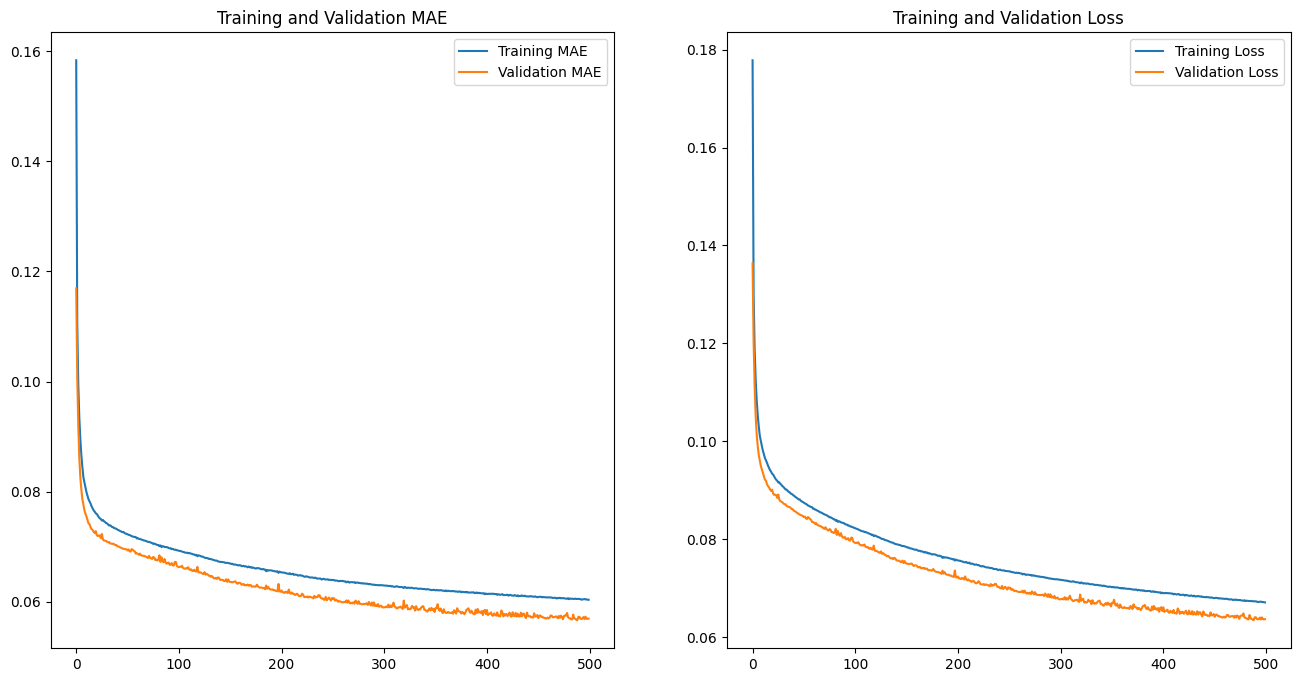

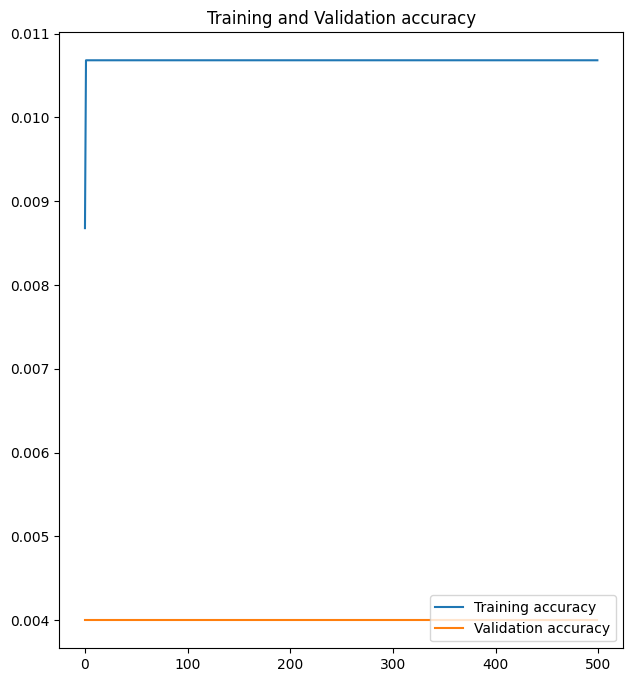

In [ ]:
mae = history.history['MAE']
val_mae = history.history['val_MAE']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(500)
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, mae, label='Training MAE')
plt.plot(epochs_range, val_mae, label='Validation MAE')
plt.legend(loc='upper right')
plt.title('Training and Validation MAE')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training accuracy')
plt.plot(epochs_range, val_acc, label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation accuracy')


plt.show()

In [ ]:
y_pred = modelo.predict(x_test).flatten()

16/16 [==============================] - 0s 4ms/step


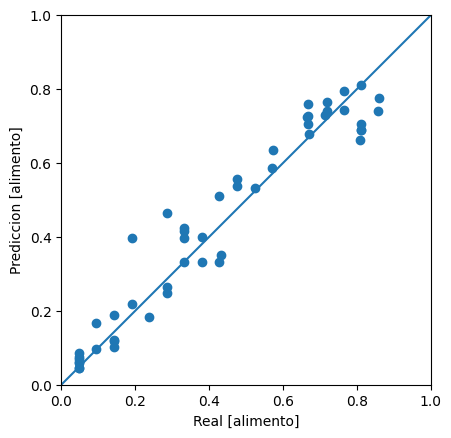

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(y_test[0:50], y_pred[0:50])
plt.xlabel('Real [alimento]')
plt.ylabel('Prediccion [alimento]')
lims = [0,1]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)

In [ ]:
xtest_ytest_df = pd.concat([x_test, y_test], axis=1)
xtest_ytest_df

,Estanque,Hectareas,tC_pm,O2_pm,Biomasa,Dias_cultivo,Dia_anio,Total
1865,0.391304,0.5,0.726496,0.557692,0.800560,0.944444,0.944444,0.667269
1930,0.086957,0.5,0.820513,0.605769,0.745258,0.977778,0.977778,0.667991
540,0.608696,0.5,0.341880,0.625000,0.225091,0.255556,0.255556,0.190132
958,0.913043,0.5,0.529915,0.480769,0.366145,0.455556,0.455556,0.427797
829,0.304348,0.5,0.435897,0.576923,0.440699,0.400000,0.400000,0.332731
...,...,...,...,...,...,...,...,...
666,0.913043,0.5,0.316239,0.586538,0.202811,0.311111,0.311111,0.237665
1594,0.782609,0.5,0.743590,0.576923,0.719093,0.800000,0.800000,0.669303
1199,0.086957,0.5,0.675214,0.615385,0.519310,0.588889,0.588889,0.665462
1070,0.652174,0.5,0.512821,0.519231,0.646881,0.511111,0.511111,0.427797


In [ ]:
y_pred_array = np.array(y_pred)
xtest_ypred_df = x_test.copy()
xtest_ypred_df['Total_Pred'] = y_pred_array
xtest_ypred_df

,Estanque,Hectareas,tC_pm,O2_pm,Biomasa,Dias_cultivo,Dia_anio,Total_Pred
1865,0.391304,0.5,0.726496,0.557692,0.800560,0.944444,0.944444,0.758669
1930,0.086957,0.5,0.820513,0.605769,0.745258,0.977778,0.977778,0.705366
540,0.608696,0.5,0.341880,0.625000,0.225091,0.255556,0.255556,0.219745
958,0.913043,0.5,0.529915,0.480769,0.366145,0.455556,0.455556,0.331003
829,0.304348,0.5,0.435897,0.576923,0.440699,0.400000,0.400000,0.423419
...,...,...,...,...,...,...,...,...
666,0.913043,0.5,0.316239,0.586538,0.202811,0.311111,0.311111,0.226928
1594,0.782609,0.5,0.743590,0.576923,0.719093,0.800000,0.800000,0.649226
1199,0.086957,0.5,0.675214,0.615385,0.519310,0.588889,0.588889,0.694332
1070,0.652174,0.5,0.512821,0.519231,0.646881,0.511111,0.511111,0.429454


In [ ]:
xt_yp_array = np.array(xtest_ypred_df)
xt_yt_array = np.array(xtest_ytest_df)

In [ ]:
y_pred_it = scaler.inverse_transform(xt_yp_array)
y_test_it = scaler.inverse_transform(xt_yt_array)

In [ ]:
ypred_itdf = pd.DataFrame(y_pred_it)
#1 ypred_itdf.columns=['Estanque', 'Hectareas', 'tC_am', 'tC_pm','O2_am', 'O2_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']
#2 ypred_itdf.columns=['Estanque', 'Hectareas', 'tC_am','O2_am', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']
ypred_itdf.columns=['Estanque', 'Hectareas', 'tC_pm', 'O2_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']
#4 ypred_itdf.columns=['Estanque', 'Hectareas', 'tC_am', 'O2_am', 'Dias_cultivo', 'Dia_anio', 'Total']
#5 ypred_itdf.columns=['Estanque', 'Hectareas', 'tC_pm', 'O2_pm', 'Dias_cultivo', 'Dia_anio', 'Total']
#6 ypred_itdf.columns=['Estanque', 'Hectareas', 'tC_am', 'tC_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']
#7 ypred_itdf.columns=['Estanque', 'Hectareas', 'tC_am', 'tC_pm', 'Dias_cultivo', 'Dia_anio', 'Total']

#8 ypred_itdf.columns=['Estanque', 'Hectareas', 'tC_am', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']

#9 ypred_itdf.columns=['Estanque', 'Hectareas', 'tC_am', 'Dias_cultivo', 'Dia_anio', 'Total']
#10 ypred_itdf.columns=['Estanque', 'Hectareas', 'tC_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']
#11 ypred_itdf.columns=['Estanque', 'Hectareas', 'tC_pm', 'Dias_cultivo', 'Dia_anio', 'Total']
#12 ypred_itdf.columns=['Estanque', 'Hectareas', 'O2_am', 'O2_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']
#13 ypred_itdf.columns=['Estanque', 'Hectareas', 'O2_am', 'O2_pm', 'Dias_cultivo', 'Dia_anio', 'Total']
#14 ypred_itdf.columns=['Estanque', 'Hectareas', 'O2_am', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']
#15 ypred_itdf.columns=['Estanque', 'Hectareas', 'O2_am', 'Dias_cultivo', 'Dia_anio', 'Total']
#16 ypred_itdf.columns=['Estanque', 'Hectareas', 'O2_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']
#17 ypred_itdf.columns=['Estanque', 'Hectareas', 'O2_pm', 'Dias_cultivo', 'Dia_anio', 'Total']
#18 ypred_itdf.columns=['Estanque', 'Hectareas', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']
#19 ypred_itdf.columns=['Estanque', 'Hectareas', 'Dias_cultivo', 'Dia_anio', 'Total']



ypred_itdf

,Estanque,Hectareas,tC_pm,O2_pm,Biomasa,Dias_cultivo,Dia_anio,Total
0,10.0,6.0,32.5,6.6,14210.0,103.0,199.0,449.021908
1,3.0,6.0,33.6,7.1,13242.0,106.0,202.0,420.987162
2,15.0,6.0,28.0,7.3,4137.0,41.0,137.0,165.574943
3,22.0,6.0,30.2,5.8,6606.0,59.0,155.0,224.091159
4,8.0,6.0,29.1,6.8,7911.0,54.0,150.0,272.697034
...,...,...,...,...,...,...,...,...
495,22.0,6.0,27.7,6.9,3747.0,46.0,142.0,169.352662
496,19.0,6.0,32.7,6.8,12784.0,90.0,186.0,391.460169
497,3.0,6.0,31.9,7.2,9287.0,71.0,167.0,415.183917
498,16.0,6.0,30.0,6.2,11520.0,64.0,160.0,275.871534


In [ ]:
ytest_itdf = pd.DataFrame(y_test_it)
#1 ytest_itdf.columns=['Estanque', 'Hectareas', 'tC_am', 'tC_pm','O2_am', 'O2_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']
#2 ytest_itdf.columns=['Estanque', 'Hectareas', 'tC_am','O2_am', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']
ytest_itdf.columns=['Estanque', 'Hectareas', 'tC_pm', 'O2_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']
#4 ytest_itdf.columns=['Estanque', 'Hectareas', 'tC_am', 'O2_am', 'Dias_cultivo', 'Dia_anio', 'Total']
#5 ytest_itdf.columns=['Estanque', 'Hectareas', 'tC_pm', 'O2_pm', 'Dias_cultivo', 'Dia_anio', 'Total']
#6 ytest_itdf.columns=['Estanque', 'Hectareas', 'tC_am', 'tC_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']
#7 ytest_itdf.columns=['Estanque', 'Hectareas', 'tC_am', 'tC_pm', 'Dias_cultivo', 'Dia_anio', 'Total']

#8 ytest_itdf.columns=['Estanque', 'Hectareas', 'tC_am', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']

#9 ytest_itdf.columns=['Estanque', 'Hectareas', 'tC_am', 'Dias_cultivo', 'Dia_anio', 'Total']
#10 ytest_itdf.columns=['Estanque', 'Hectareas', 'tC_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']
#11 ytest_itdf.columns=['Estanque', 'Hectareas', 'tC_pm', 'Dias_cultivo', 'Dia_anio', 'Total']
#12 ytest_itdf.columns=['Estanque', 'Hectareas', 'O2_am', 'O2_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']
#13 ytest_itdf.columns=['Estanque', 'Hectareas', 'O2_am', 'O2_pm', 'Dias_cultivo', 'Dia_anio', 'Total']
#14 ytest_itdf.columns=['Estanque', 'Hectareas', 'O2_am', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']
#15 ytest_itdf.columns=['Estanque', 'Hectareas', 'O2_am', 'Dias_cultivo', 'Dia_anio', 'Total']
#16 ytest_itdf.columns=['Estanque', 'Hectareas', 'O2_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']
#17 ytest_itdf.columns=['Estanque', 'Hectareas', 'O2_pm', 'Dias_cultivo', 'Dia_anio', 'Total']
#18 ytest_itdf.columns=['Estanque', 'Hectareas', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']
#19 ytest_itdf.columns=['Estanque', 'Hectareas', 'Dias_cultivo', 'Dia_anio', 'Total']


ytest_itdf

,Estanque,Hectareas,tC_pm,O2_pm,Biomasa,Dias_cultivo,Dia_anio,Total
0,10.0,6.0,32.5,6.6,14210.0,103.0,199.0,400.95
1,3.0,6.0,33.6,7.1,13242.0,106.0,202.0,401.33
2,15.0,6.0,28.0,7.3,4137.0,41.0,137.0,150.00
3,22.0,6.0,30.2,5.8,6606.0,59.0,155.0,275.00
4,8.0,6.0,29.1,6.8,7911.0,54.0,150.0,225.00
...,...,...,...,...,...,...,...,...
495,22.0,6.0,27.7,6.9,3747.0,46.0,142.0,175.00
496,19.0,6.0,32.7,6.8,12784.0,90.0,186.0,402.02
497,3.0,6.0,31.9,7.2,9287.0,71.0,167.0,400.00
498,16.0,6.0,30.0,6.2,11520.0,64.0,160.0,275.00


In [ ]:
mae = tf.keras.losses.MeanAbsoluteError()
mae(ytest_itdf['Total'], ypred_itdf['Total']).numpy()

29.955790904687202

In [ ]:
r2_score(ytest_itdf['Total'], ypred_itdf['Total'])

0.9061523851961522

In [ ]:
import joblib
joblib.dump(modelo, 'intento1.pkl')

['intento2.pkl']